*This Notebook was created by Antoine Palisson*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

This exercise focus on the preprocessing steps of Numerical variables.

Only a fraction of the methods will be used in this Notebook, including:

* Random & Stratified Splitting 
* Missing Data deletion & imputation with median
* Outliers detection using the IQR & imputation using winsorization
* Scaling using the min-max transformation and the z-score transformation
* Transformation of the features using the log transformation 


Depending on the dataset, it may be interesting to use other methods seen in the lesson (missing Data imputation using ML models, outlier detection using z-score, robust scaling, other transformation ...)

# Splitting, Missing & Outliers

**<font color='blue'>1. Load the modified iris dataset (`iris_m.csv`) and show its content.**

In [ ]:
iris = pd.read_csv('iris_m.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,3.5,1.4,0.2,0
1,4.9,3.0,1.4,NaN,0
2,4.7,3.2,1.3,0.2,0
3,36.8,3.1,1.5,0.2,0
4,5.0,NaN,12.6,NaN,0


The `.info()` method can be used on a dataframe to get a resume of its variables, length and missing values. This method has some parameters such as the **show_counts** parameter that can be either True or False, if True the method returns the number of non-missing values in the dataset.

**<font color='blue'>2. Show a resume of the dataset variables, length and missing values.<br>Is there any missing variable ?**

In [ ]:
# All the columns excepted the target have missing values
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  133 non-null    float64
 1   sepal width (cm)   134 non-null    float64
 2   petal length (cm)  134 non-null    float64
 3   petal width (cm)   133 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Splitting

There are many ways to split a dataset into a training and a testing set:

*   Train-test split using scikit-learn
*   Slicing using numpy
*   Sample using pandas

In the following, we will use the `train_test_split` function from sklearn [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).<br> Here are some of the most important parameters:

*   **`test_size`**: This parameter specifies the proportion of the dataset to be used for testing. It is typically set to a decimal value between 0 and 1, where 0.2 or 0.3 is commonly used.

*   **`train_size`**: This parameter specifies the proportion of the dataset to be used for training. If test_size is not specified, the remaining portion of the dataset will be used for training. If both test_size and train_size are specified, test_size takes precedence.

*   **`random_state`**: This parameter sets the random seed for the random number generator used for the train-test split. Setting a fixed random_state ensures that the same split is obtained every time the code is run, which is useful for reproducibility.

*   **`shuffle`**: This parameter determines whether or not to shuffle the dataset before splitting. By default, it is set to True, meaning that the data is shuffled randomly before splitting.

*   **`stratify`**: This parameter is used for stratified sampling, which ensures that the proportion of each class or category is preserved in both the training and testing sets. It requires a target vector y to be passed as an argument.

In addition to its parameters, an indefinite number of datasets can be passed to the function:
> `train_test_split(X_1, X_2, X_3 ...)`

The `train_test_split` function returns two times the number of datasets passed as inputs: the training sets and then the testing sets.<br>
> `X_train, X_test = train_test_split(X, ...)`<br>
> `X_train, X_test, Y_train, Y_test = train_test_split(X, Y ...)`<br>
> `X_train, X_test, Y_train, Y_test, Z_train, Z_test = train_test_split(X, Y, Z ...)`



**<font color='blue'>1. Split the iris dataset into 3 sets using the `train_test_split` function:**


*   **<font color='blue'>Training (70% of the data)**
*   **<font color='blue'>Validation (10% of the data)**
*   **<font color='blue'>Testing (20% of the data)**



In [ ]:
from sklearn.model_selection import train_test_split
test_size = 0.2
val_size = 0.1

iris_train, iris_test = train_test_split(iris, 
                                         test_size=test_size, 
                                         random_state=42)

iris_train, iris_val = train_test_split(iris_train, 
                                        test_size=val_size/(1-test_size), 
                                        random_state=42)

In [ ]:
print(f'Training shape   : {iris_train.shape} - {len(iris_train)/len(iris):.0%}')
print(f'Validation shape : {iris_val.shape} - {len(iris_val)/len(iris):.0%}')
print(f'Testing shape    : {iris_test.shape} - {len(iris_test)/len(iris):.0%}')

Training shape   : (105, 5) - 70%
Validation shape : (15, 5) - 10%
Testing shape    : (30, 5) - 20%


**<font color='blue'>2. Count the frequency of categories in the target column of the training, the validation and the testing set.<br> Are the frequencies identical in the 3 sets ?**

*Tips: You can use the `value_counts()` function and set the normalize argument to True in order to get frequencies.*

In [ ]:
iris_train['target'].value_counts(normalize=True)

0    0.352381
2    0.333333
1    0.314286
Name: target, dtype: float64

In [ ]:
iris_test['target'].value_counts(normalize=True)

2    0.366667
0    0.333333
1    0.300000
Name: target, dtype: float64

In [ ]:
# The validation set has very different target frequencies
iris_val['target'].value_counts(normalize=True)

1    0.533333
2    0.266667
0    0.200000
Name: target, dtype: float64

**<font color='blue'>3. Set the `stratify` parameter of the train_test_split function to the target column and re-create the training, validation and testing sets.**

In [ ]:
iris_train, iris_test = train_test_split(iris, 
                                         test_size=test_size, 
                                         random_state=42, 
                                         stratify=iris['target'])

iris_train, iris_val = train_test_split(iris_train, 
                                        test_size=val_size/(1-test_size), 
                                        random_state=42, 
                                        stratify=iris_train['target'])

**<font color='blue'>4. Count the frequency of categories in the target column of the training, the validation and the testing set.<br> Are the frequencies identical in the 3 sets now ?**

In [ ]:
iris_train['target'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [ ]:
# Now the frequencies are identical !
iris_test['target'].value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: target, dtype: float64

In [ ]:
# Now the frequencies are identical !
iris_val['target'].value_counts(normalize=True)

0    0.333333
2    0.333333
1    0.333333
Name: target, dtype: float64

**<font color='blue'>5. Separate the features from the target for the training, the validation and the testing sets.**

In [ ]:
X_train = iris_train.copy()
y_train = X_train.pop('target')

X_val = iris_val.copy()
y_val = X_val.pop('target')

X_test = iris_test.copy()
y_test = X_test.pop('target')

## Missing data

The missing values can be found in a dataframe using the `.isna()` method.

**<font color='blue'>1. Count the number of NaN in the feature of the training iris dataframe.**

*Tips: You can use the `.isna()` method and the `.sum()` method.*

In [ ]:
X_train.isna().sum()

sepal length (cm)    12
sepal width (cm)     11
petal length (cm)    11
petal width (cm)     12
dtype: int64

Pandas provides a `.dropna()` function that can be used to remove rows or columns that contain missing values (i.e., NaN values) from a DataFrame. This function returns a new DataFrame with the missing values removed, leaving only the non-missing values.

Here are some of the most important parameters of the dropna() function in pandas:

* `axis`: This parameter specifies whether to drop rows (axis=0) or columns (axis=1) that contain missing values. By default, axis=0 is used to drop rows.

* `how`: This parameter specifies the criteria for dropping rows or columns. The how parameter can take the value 'any' or 'all'. If 'any' is specified, any row or column with at least one missing value will be dropped. If 'all' is specified, only rows or columns where all values are missing will be dropped.

* `thresh`: This parameter specifies the minimum number of non-missing values required for a row or column to be kept. Rows or columns with fewer than thresh non-missing values will be dropped. The thresh parameter can be used to keep only rows or columns that have a certain level of completeness.

* `subset`: This parameter specifies a subset of columns to consider when dropping rows or columns. Only the specified columns will be checked for missing values. This parameter can be useful when there are some columns in the DataFrame that are not relevant for the analysis.

* `inplace`: This parameter specifies whether to modify the DataFrame in place (inplace=True) or return a new DataFrame with the missing values removed (inplace=False). By default, inplace=False.

**<font color='blue'>2.a. Create a copy of the feature of iris_train using the .copy() function.<br>2.b. Drop the missing values on the copy of the iris_train.<br>How many rows were removed ?**

In [ ]:
# 40 rows were removed .. about 40% of the training set ! 
X_train_copy = X_train.copy()
X_train_copy.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
121,5.6,2.8,4.9,2.0
65,6.7,3.1,4.4,1.4
40,35.0,3.5,11.7,0.3
130,7.4,2.8,6.1,13.3
23,5.1,3.3,1.7,0.5
...,...,...,...,...
45,4.8,3.0,1.4,0.3
120,6.9,3.2,5.7,2.3
92,5.8,13.0,4.0,1.2
9,4.9,3.1,1.5,0.7


Missing values can be imputed using either pandas or sklearn.

The `sklearn.impute` [module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) in scikit-learn provides various classes for imputing missing values in datasets. This module contains several popular strategies for handling missing values, including:

*   `SimpleImputer`: This class provides a basic imputation strategy for missing values in numerical datasets. It allows the user to specify a strategy for filling in missing values, such as using the mean, median, or most frequent value of each column.

*   `KNNImputer`: This class provides an unsupervised ML imputation strategy that uses the k-nearest neighbors algorithm to impute missing values in numerical datasets. It estimates each missing value based on the values of its k-nearest neighbors in the dataset.

Here are some of the most important parameters of the `SimpleImputer` class:

* `missing_values`: This parameter specifies the value or values that should be treated as missing values. By default, missing_values=np.nan is used to identify missing values.

* `strategy`: This parameter specifies the strategy used for imputing missing values. The possible values are 'mean', 'median', 'most_frequent', or 'constant'. If 'mean' is specified, missing values are imputed using the mean value of the corresponding feature. If 'median' is specified, missing values are imputed using the median value of the corresponding feature. If 'most_frequent' is specified, missing values are imputed using the most frequent value of the corresponding feature. If 'constant' is specified, missing values are imputed with a user-specified constant value.

* `fill_value`: This parameter is used only when the strategy parameter is set to 'constant'. It specifies the value that should be used to impute missing values.

To use the `SimpleImputer`, you need to:

1.   Create the imputer
2.   Fit the imputer on the desired data
3.   Transform the desired data

```
imp = SimpleImputer(...)
imp.fit(X)
X_no_nan = imp.transform(X)
```

`SimpleImputer` also have some attributes that can be used after using the fit() method on the data.<br> The `statistics_` attribute is an attribute of the `SimpleImputer` class in scikit-learn, which contains the imputation values for each feature in the input dataset.

**<font color='blue'>3.a. Create a copy of the iris_train using the `.copy()` function.<br>3.b. Replace the missing values on the copy of the iris_train by their median using the `SimpleImputer` from sklearn.<br>3.c. Get the median values for each columns using the `statistics_` attribute.**

In [ ]:
from sklearn.impute import SimpleImputer
X_train_copy = X_train.copy()
imp = SimpleImputer(strategy='median')

# Fit + transform at the same time
X_train_no_nan = imp.fit_transform(X_train_copy)

In [ ]:
# The output of the SimpleImputer is a numpy array
# You can convert it back to a dataframe using the following syntax
X_train_no_nan = pd.DataFrame(X_train_no_nan,
                              columns=X_train_copy.columns)
X_train_no_nan.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.6,2.8,4.90,2.0
1,6.7,3.0,4.55,2.3
2,4.9,2.5,4.50,1.4
3,6.7,3.1,4.40,1.4
4,35.0,3.5,11.70,0.3


In [ ]:
# All the missing values have been replaced by the median !
X_train_no_nan.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
for col, stat in zip(X_train_no_nan.columns, imp.statistics_):
    print(f"{col:18} - median = {stat}")

sepal length (cm)  - median = 6.0
sepal width (cm)   - median = 3.0
petal length (cm)  - median = 4.55
petal width (cm)   - median = 1.4


**<font color='blue'>4. Apply the missing values imputation to the validation and the testing sets.**

*Tips: You must reuse the computations made on the training set (e.g. the median should not be calculated on the validation and the testing sets)*

In [ ]:
# .transform() NOT .fit()
X_val_no_nan = imp.transform(X_val)
X_test_no_nan = imp.transform(X_test)

In [ ]:
# No more missing values
X_test_no_nan = pd.DataFrame(X_test_no_nan,
                             columns=X_val.columns)
X_test_no_nan.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# No more missing values
X_val_no_nan = pd.DataFrame(X_val_no_nan,
                            columns=X_val.columns)
X_val_no_nan.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Outliers

In the following exercise, we will use the imputed feature training set.

**<font color='blue'>1. Display the histograms of the imputed features of the training iris *(i.e. the ones that does not contain NaN anymore)*.<br> Can you see outliers ?**

*Tips: Outliers are easier to detect if you increase the number of bins in your histogram*

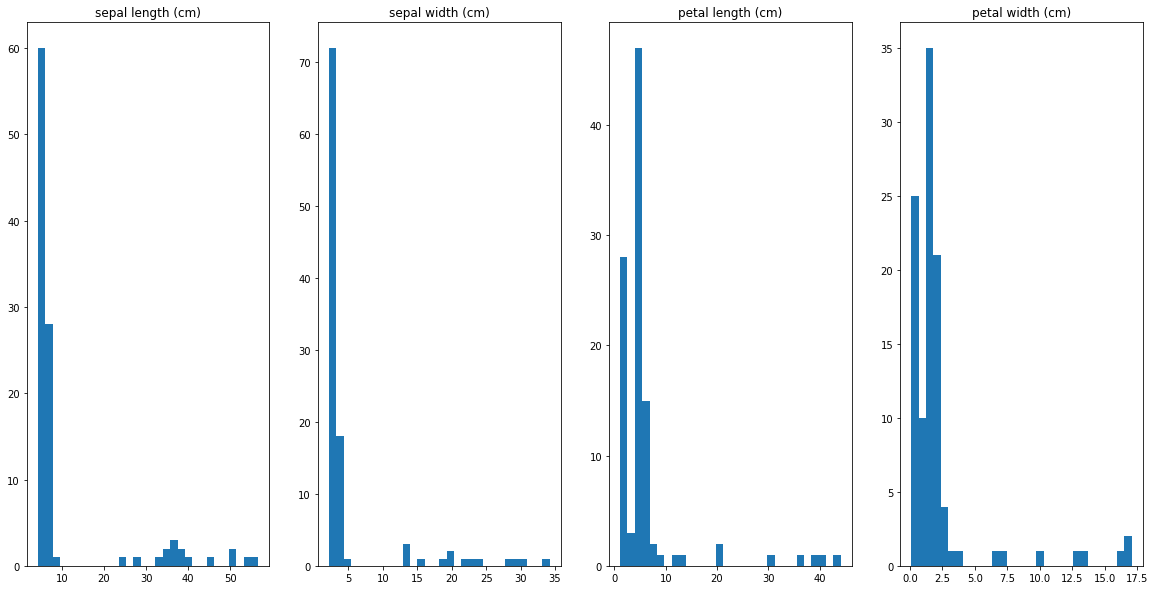

In [ ]:
# There is a lot of outliers
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_no_nan.columns, np.ravel(axs)):
    ax.hist(X_train_no_nan[col], bins=30)
    ax.set_title(col)

plt.show()

**<font color='blue'>2. Do the same with boxplot.**

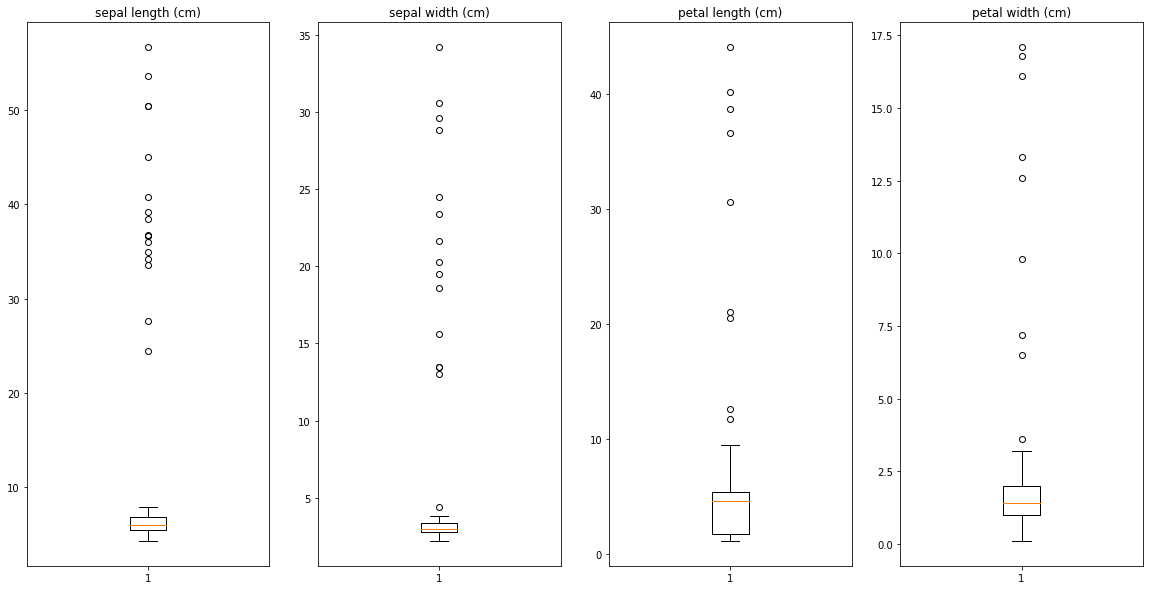

In [ ]:
# There is a lot of outliers
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_no_nan.columns, np.ravel(axs)):
    ax.boxplot(X_train_no_nan[col])
    ax.set_title(col)

plt.show()

The interquartile range can be used to detect outliers.

It can be done using the scipy `iqr()` class [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html). <br> In this exercise, we will do it manually on the imputed training features of the iris dataset.



**<font color='blue'>3.a. Calculate the 1st quartile (Q1) and the 3rd quartile (Q3) of the data.**

*Tips: It can be done using the pandas [quantile() method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) or the Numpy [quantile() method](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html)*

In [ ]:
Q1 = X_train_no_nan.quantile(q=0.25)
Q1

sepal length (cm)    5.5
sepal width (cm)     2.8
petal length (cm)    1.7
petal width (cm)     1.0
Name: 0.25, dtype: float64

In [ ]:
Q3 = X_train_no_nan.quantile(q=0.75)
Q3

sepal length (cm)    6.9
sepal width (cm)     3.4
petal length (cm)    5.4
petal width (cm)     2.0
Name: 0.75, dtype: float64

**<font color='blue'>3.b. Calculate the interquartile range: IQR = Q3 - Q1.**

In [ ]:
IQR = Q3-Q1
IQR

sepal length (cm)    1.4
sepal width (cm)     0.6
petal length (cm)    3.7
petal width (cm)     1.0
dtype: float64

**<font color='blue'>3.c. Calculate the lower cutoff Q1 - 1.5 x IQR and the higher cutoff Q3 + 1.5 x IQR**

In [ ]:
low_cut = Q1 - 1.5 * IQR
hig_cut = Q3 + 1.5 * IQR

**<font color='blue'>3.d. Use the lower and the higher cutoff to find the outliers in the data.**

*Tips: Any value higher than the higher cutoff or lower than the lower cutoff is an outlier.*

In [ ]:
outliers_upper = X_train_no_nan[X_train_no_nan[X_train_no_nan > hig_cut].notna().any(axis=1)]
outliers_lower = X_train_no_nan[X_train_no_nan[X_train_no_nan < low_cut].notna().any(axis=1)]

In [ ]:
# Look at the very high values
outliers_upper.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
4,35.0,3.5,11.7,0.3
5,7.4,2.8,6.1,13.3
8,7.7,3.0,36.6,2.3
9,6.0,2.9,38.7,1.3
10,5.8,2.8,5.1,16.8


In [ ]:
# No lower bound outliers
outliers_lower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)


In [ ]:
print(f"There are : {len(outliers_upper)} outliers in the training data.")

There are : 43 outliers in the training data.


**<font color='blue'>4. Replace the upper outliers by the Q3 value and the lower outliers by the Q1 value.**

*Tips: You can use the `.mask()` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html) of pandas.*

In [ ]:
# There is no lower bound outliers, so only the upper bound ones are replaced
X_train_no_out_nan = X_train_no_nan.mask(cond=X_train_no_nan > hig_cut, 
                                         other=Q3, 
                                         axis=1)
X_train_no_out_nan.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.6,2.8,4.90,2.0
1,6.7,3.0,4.55,2.3
2,4.9,2.5,4.50,1.4
3,6.7,3.1,4.40,1.4
4,6.9,3.5,5.40,0.3


**<font color='blue'>5. Apply the same outlier transformation to the validation and the testing sets.**

In [ ]:
# Re-use of the hig_cut and the Q3 values
X_val_no_out_nan = X_val_no_nan.mask(cond=X_val_no_nan > hig_cut, 
                                     other=Q3, 
                                     axis=1)
X_val_no_out_nan.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.5,4.2,1.40,0.2
1,6.2,3.4,5.40,2.3
2,5.0,3.4,4.55,0.4
3,5.5,3.0,3.70,1.0
4,6.0,2.9,4.50,1.5


In [ ]:
# Re-use of the hig_cut and the Q3 values
X_test_no_out_nan = X_test_no_nan.mask(cond=X_test_no_nan > hig_cut, 
                                       other=Q3, 
                                       axis=1)
X_test_no_out_nan.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.4,3.0,1.30,1.8
1,6.1,3.0,4.90,1.8
2,4.9,2.4,4.55,1.4
3,5.0,2.3,3.30,1.0
4,4.4,3.0,1.30,0.2


# Transformation

**In the following exercise, we will use the cleaned iris training dataset <br>*i.e. the dataset without any missing values and outliers obtained at the previous exercise.***

## Log transformation

**<font color='blue'>1. Display the histograms of the features.**

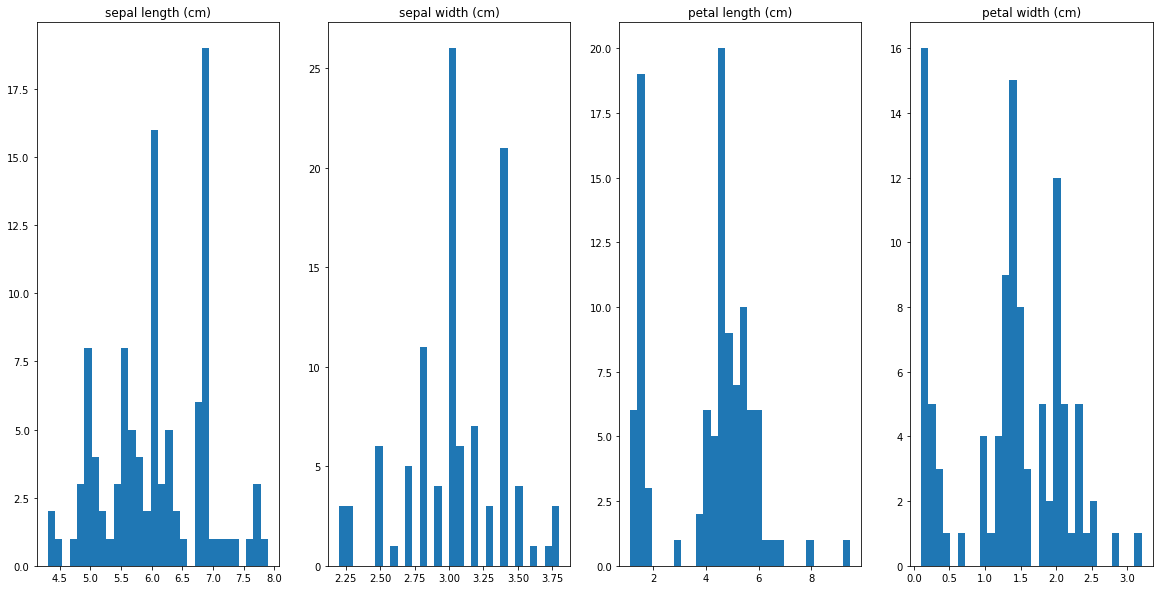

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_no_out_nan.columns, np.ravel(axs)):
    ax.hist(X_train_no_out_nan[col], bins=30)
    ax.set_title(col)

plt.show()

**<font color='blue'>2. Apply the logarithm transformation to the features.**

*Tips: You can use the log() function from Numpy.*

In [ ]:
X_train_log = np.log(X_train_no_out_nan)
X_train_log.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,1.722767,1.029619,1.589235,0.693147
1,1.902108,1.098612,1.515127,0.832909
2,1.589235,0.916291,1.504077,0.336472
3,1.902108,1.131402,1.481605,0.336472
4,1.931521,1.252763,1.686399,-1.203973


**<font color='blue'>3. Display the histograms of the modified features.<br> What happened ?**

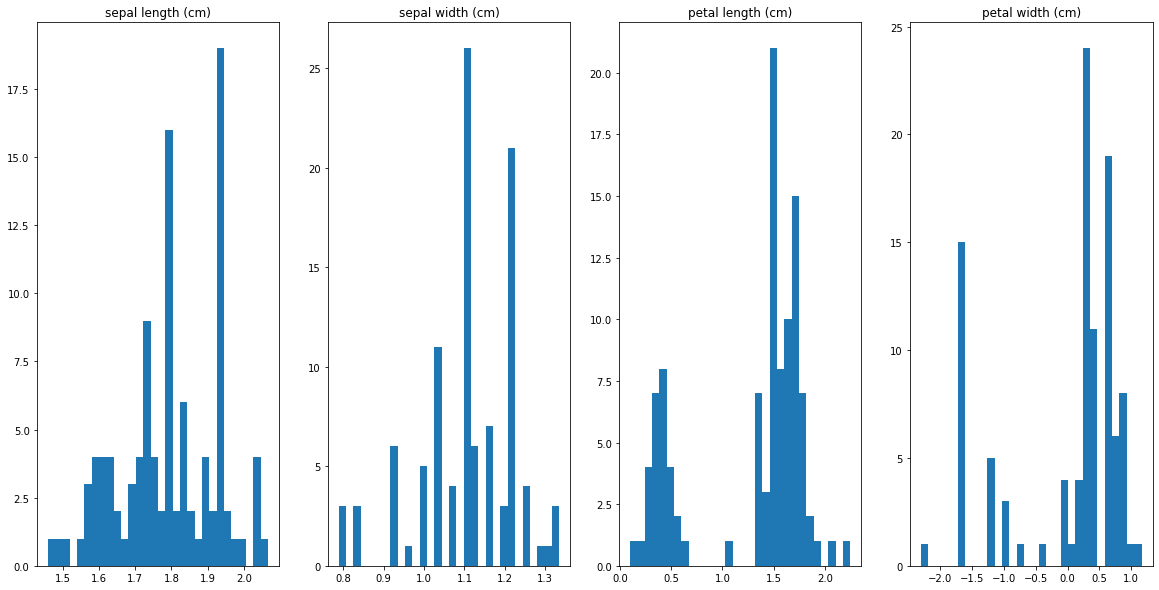

In [ ]:
# The petal length (cm) histograms is better defined
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_log.columns, np.ravel(axs)):
    ax.hist(X_train_log[col], bins=30)
    ax.set_title(col)

plt.show()

## Min-Max Scaling

First, let's compute the Min-Max Scaling by hands.

**<font color='blue'>1. Calculate the minimum and the maximum of the features.**

*Tips: You can use the pandas .min() and .max() methods directly on the dataframe.*

In [ ]:
min_ = X_train_no_out_nan.min()
max_ = X_train_no_out_nan.max()
print(f'Minimum :\n{min_}\n\nMaximum :\n{max_}')

Minimum :
sepal length (cm)    4.3
sepal width (cm)     2.2
petal length (cm)    1.1
petal width (cm)     0.1
dtype: float64

Maximum :
sepal length (cm)    7.9
sepal width (cm)     3.8
petal length (cm)    9.5
petal width (cm)     3.2
dtype: float64


The min-max scaling method is simply:

$X = \frac{X-X_{min}}{X_{max}-X_{min}}$

**<font color='blue'>2. Transform the features using the min-max scaling method.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [ ]:
X_train_std = (X_train_no_out_nan - min_)/(max_ - min_)
X_train_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361111,0.3750,0.452381,0.612903
1,0.666667,0.5000,0.410714,0.709677
2,0.166667,0.1875,0.404762,0.419355
3,0.666667,0.5625,0.392857,0.419355
4,0.722222,0.8125,0.511905,0.064516


**<font color='blue'>3. Apply the min-max scaling method to the validation and testing sets.**

*Tips: Similarly, you need to reuse the calculations made on the training set.*

In [ ]:
# Reuse the min and the max of the training set
X_val_std = (X_val_no_out_nan - min_)/(max_ - min_)
X_test_std = (X_test_no_out_nan - min_)/(max_ - min_)

In [ ]:
X_test_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.027778,0.5000,0.023810,0.548387
1,0.500000,0.5000,0.452381,0.548387
2,0.166667,0.1250,0.410714,0.419355
3,0.194444,0.0625,0.261905,0.290323
4,0.027778,0.5000,0.023810,0.032258


The `MinMaxScaler` [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) is used to transform numerical data into a specific range, typically between 0 and 1, by scaling each feature to a specified minimum and maximum value.

The MinMaxScaler class has two important methods, `fit()` and `transform()`.

* `fit()` is used to compute the minimum and maximum values for each feature in the input data. These values are used to perform the scaling operation.

* `transform()` is used to perform the actual scaling operation on the input data using the computed minimum and maximum values.

Here's an example usage of MinMaxScaler:

```
scl=MinMaxScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
```

**<font color='blue'>4. Do the same as the previous questions using the Sklearn `MinMaxScaler` class.**

*Tips: Again, don't forget to compute on the training set and to only apply on the validation & resting sets*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(X_train_no_out_nan)

# The result is the Numpy array, not a Pandas dataframe
X_train_std = minmax.transform(X_train_no_out_nan) 

In [ ]:
# Convert the Numpy array to the Pandas dataframe
X_train_std = pd.DataFrame(X_train_std,
                           columns=X_train.columns)
X_train_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361111,0.3750,0.452381,0.612903
1,0.666667,0.5000,0.410714,0.709677
2,0.166667,0.1875,0.404762,0.419355
3,0.666667,0.5625,0.392857,0.419355
4,0.722222,0.8125,0.511905,0.064516


**<font color='blue'>5. Display the histograms of the scaled features. What can you see ?**

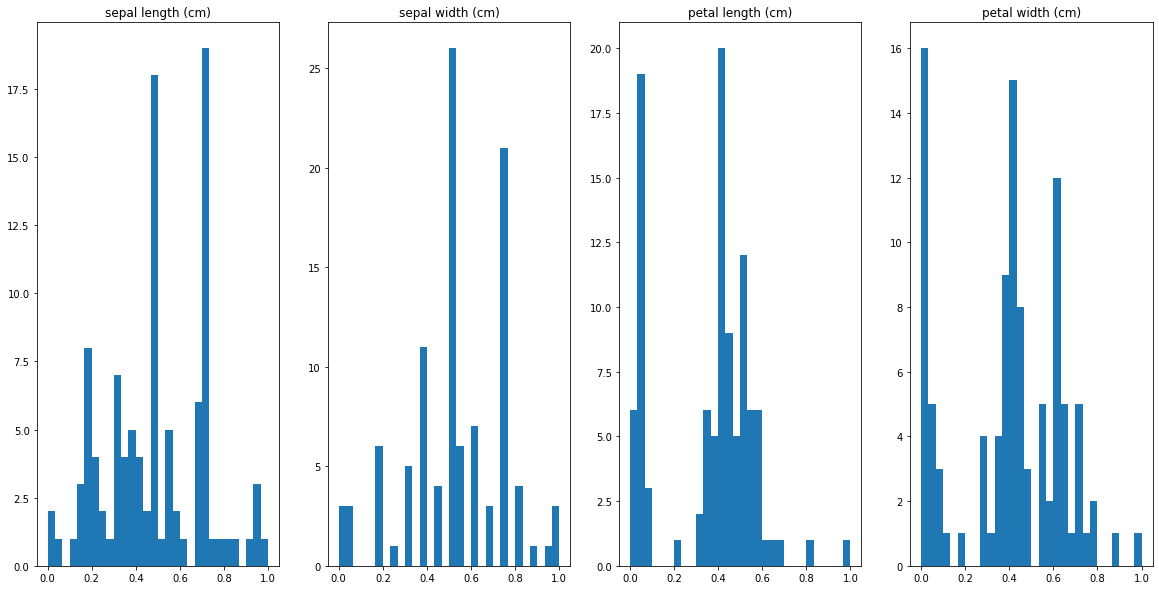

In [ ]:
# It looks the same as the histograms without scaling
# because MinMax keeps the magnitude of the data
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_std.columns, np.ravel(axs)):
    ax.hist(X_train_std[col], bins=30)
    ax.set_title(col)

plt.show()

## Standardization

First, let's compute the z-score Scaling by hands.

**<font color='blue'>1. Calculate the mean and the standard deviation of the features.**

*Tips: You can use the pandas .mean() and .std() methods directly on the dataframe.*

In [ ]:
mean = X_train_no_out_nan.mean()
std = X_train_no_out_nan.std()
print(f'Mean :\n{mean}\n\nStandard Deviation :\n{std}')

Mean :
sepal length (cm)    6.058095
sepal width (cm)     3.047619
petal length (cm)    4.098571
petal width (cm)     1.340952
dtype: float64

Standard Deviation :
sepal length (cm)    0.824596
sepal width (cm)     0.360047
petal length (cm)    1.786588
petal width (cm)     0.732710
dtype: float64


The z-score scaling method is simply:

$X = \frac{X-X_{mean}}{X_{std}}$

**<font color='blue'>2. Transform the features using the z-score scaling method.**

*Tips: You can transform all the features simultaneously if you are using a Pandas dataframe or a Numpy array.*

In [ ]:
X_train_std = (X_train_no_out_nan - mean) / std
X_train_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.555539,-0.687741,0.448580,0.899465
1,0.778448,-0.132258,0.252676,1.308904
2,-1.404440,-1.520966,0.224690,0.080588
3,0.778448,0.145484,0.168717,0.080588
4,1.020991,1.256450,0.728444,-1.420687


**<font color='blue'>3. Apply the z-score scaling method to the validation and testing sets.**

*Tips: Similarly, you need to reuse the calculations made on the training set.*

In [ ]:
X_test_std = (X_test_no_out_nan - mean) / std
X_val_std = (X_val_no_out_nan - mean) / std 

In [ ]:
X_test_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-2.010798,-0.132258,-1.566434,0.626506
1,0.050819,-0.132258,0.448580,0.626506
2,-1.404440,-1.798708,0.252676,0.080588
3,-1.283169,-2.076450,-0.446981,-0.465330
4,-2.010798,-0.132258,-1.566434,-1.557167


`StandardScaler` is a scikit-learn [class](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) that is used to standardize numerical data by removing the mean and scaling to unit variance.

The `StandardScaler` class in scikit-learn has two main methods: `fit()` and `transform()`.

* `fit()` is used to compute the mean and standard deviation of each feature in the input data. These values are used to perform the standardization operation.

* `transform()` is used to perform the actual standardization operation on the input data using the computed mean and standard deviation values.

Here's an example usage of `StandardScaler`:

```
scl=StandardScaler()
scl.fit(X_train)
X_train_std = scl.transform(X_train)
```

**<font color='blue'>4. Do the same as the previous questions using the Sklearn `StandardScaler` class.**

*Tips: Again, don't forget to compute on the training set and to only apply on the validation & resting sets*

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train_no_out_nan)
X_train_std = std.transform(X_train_no_out_nan)

In [ ]:
# Convert the Numpy array to the Pandas dataframe
X_train_std = pd.DataFrame(X_train_std,
                           columns=X_train.columns)
X_train_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.558204,-0.691040,0.450732,0.903779
1,0.782182,-0.132892,0.253888,1.315182
2,-1.411176,-1.528261,0.225768,0.080974
3,0.782182,0.146181,0.169527,0.080974
4,1.025888,1.262477,0.731937,-1.427501


**<font color='blue'>5. Compare the results with the MinMaxScaler.**

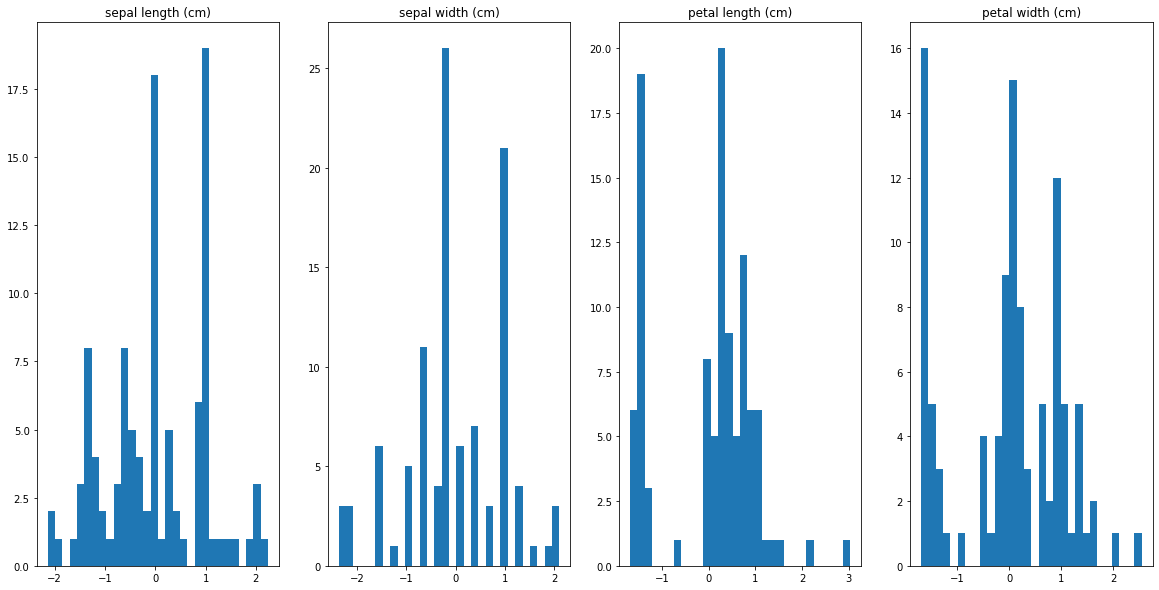

In [ ]:
# It looks the same as the histograms without scaling
# because StandardSclaer keeps both the magnitude & direction of the data
fig, axs = plt.subplots(1,4, figsize=(20,10))

for col, ax in zip(X_train_std.columns, np.ravel(axs)):
    ax.hist(X_train_std[col], bins=30)
    ax.set_title(col)

plt.show()

In [ ]:
for col in X_train_std.columns:
    print(f"{col} - mean = {X_train_std[col].mean()} / std = {X_train_std[col].std()}")